### Ryan Langlois
Sign Language Computer Vision

Initial Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Loading Data

In [3]:
train_data = pd.read_csv('https://raw.githubusercontent.com/Astute-2319/CS5990-Group7-Final-Project/refs/heads/main/archive/sign_mnist_train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/Astute-2319/CS5990-Group7-Final-Project/refs/heads/main/archive/sign_mnist_test.csv')

train_data_labels = pd.get_dummies(train_data['label'], dtype = int).to_numpy()
test_data_labels = pd.get_dummies(test_data['label'], dtype = int).to_numpy()

train_data = train_data.drop('label', axis = 1).to_numpy().reshape(train_data.shape[0], 28, 28, 1)
test_data = test_data.drop('label', axis = 1).to_numpy().reshape(test_data.shape[0], 28, 28, 1)

Check data loaded properly

In [4]:
train_data_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

**In the data, label 0 is 'A', label 1 is 'B', etc.**

No J or Z in the dataset

In [5]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

Keras stuff - CSV

In [6]:
import tensorflow as tf
from tensorflow.keras import layers

In [7]:
model = tf.keras.Sequential([
  layers.Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)),
  layers.BatchNormalization(),
  layers.MaxPool2D((2, 2), strides=2, padding="same"),
  layers.Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"),
  layers.Dropout(0.2),
  layers.BatchNormalization(),
  layers.MaxPool2D((2, 2), strides=2, padding="same"),
  layers.Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPool2D((2, 2), strides=2, padding="same"),
  layers.Flatten(),
  layers.Dense(units=512, activation="relu"),
  layers.Dropout(0.3),
  layers.Dense(units=24, activation="softmax")
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.fit(train_data, train_data_labels, epochs=7)

Epoch 1/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 124s 141ms/step - accuracy: 0.7297 - loss: 0.9189
Epoch 2/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 129s 126ms/step - accuracy: 0.9924 - loss: 0.0276
Epoch 3/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 107s 124ms/step - accuracy: 0.9900 - loss: 0.0316
Epoch 4/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 141s 123ms/step - accuracy: 0.9979 - loss: 0.0064
Epoch 5/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 141s 122ms/step - accuracy: 0.9903 - loss: 0.0331
Epoch 6/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 144s 124ms/step - accuracy: 0.9977 - loss: 0.0087
Epoch 7/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 140s 122ms/step - accuracy: 0.9958 - loss: 0.0122


In [9]:
prediction = model.predict(test_data)
guesses = []

for p in prediction:
    guesses.append(np.argmax(p))

prediction = guesses

225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step


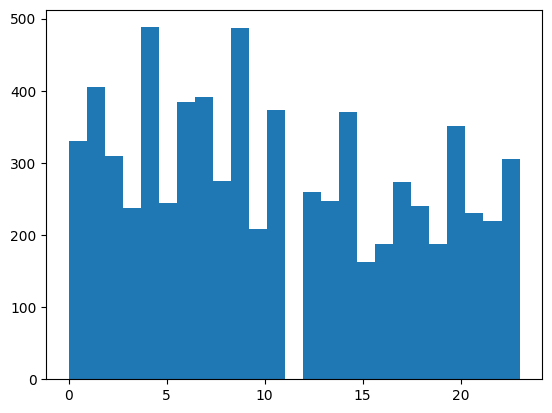

In [10]:
# This is a histogram of counts given to each label
plt.hist(prediction, bins=25)
plt.show()

In [11]:
total_correct = 0
index = 0
for index, p in enumerate(prediction):
    if p == np.argmax(test_data_labels[index]):
        total_correct += 1

print("Total correct:", total_correct)
print("Total items:", len(test_data_labels))
print("Ratio correct:", total_correct/len(test_data_labels))

Total correct: 6685
Total items: 7172
Ratio correct: 0.9320970440602342


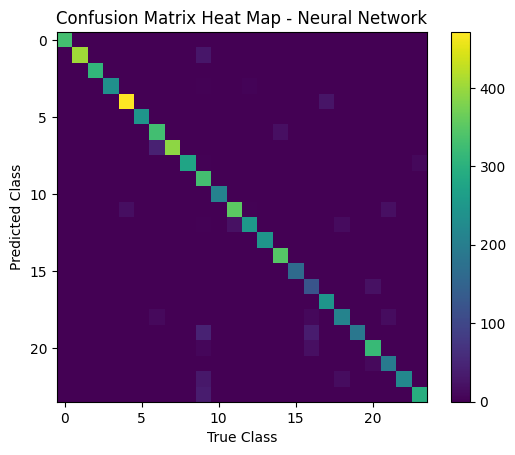

In [14]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(np.argmax(test_data_labels, axis=1), prediction)
conf_matrix = pd.DataFrame(conf_matrix, columns = labels, index = labels)
plt.title('Confusion Matrix Heat Map - Neural Network')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.imshow(conf_matrix)
plt.colorbar()